In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
from random import sample
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import tqdm as notebook_tqdm
import tensorflow_datasets as tfds

from src.data_visuals import view_10_random_images
from src.utils import save_dataset_as_pngs

print(tf.__version__)

2.18.0


In [6]:
(train, test), info = tfds.load(
    'food101',
    data_dir='data',
    split=['train', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
info

tfds.core.DatasetInfo(
    name='food101',
    full_name='food101/2.0.0',
    description="""
    This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
    """,
    homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
    data_dir='data/food101/2.0.0',
    file_format=tfrecord,
    download_size=4.65 GiB,
    dataset_size=4.77 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=75750, num

# Exploring data

For convenient viewing of the data, a function displaying 10 random samples was created, optionally with selection of a specific classes.

In [7]:
with open("data/food101/2.0.0/label.labels.txt") as file:
    label_names = file.read().splitlines()
    
pd.DataFrame(label_names)

0
0         apple_pie
1    baby_back_ribs
2           baklava
3    beef_carpaccio
4      beef_tartare
..              ...
96            tacos
97         takoyaki
98         tiramisu
99     tuna_tartare
100         waffles

[101 rows x 1 columns]

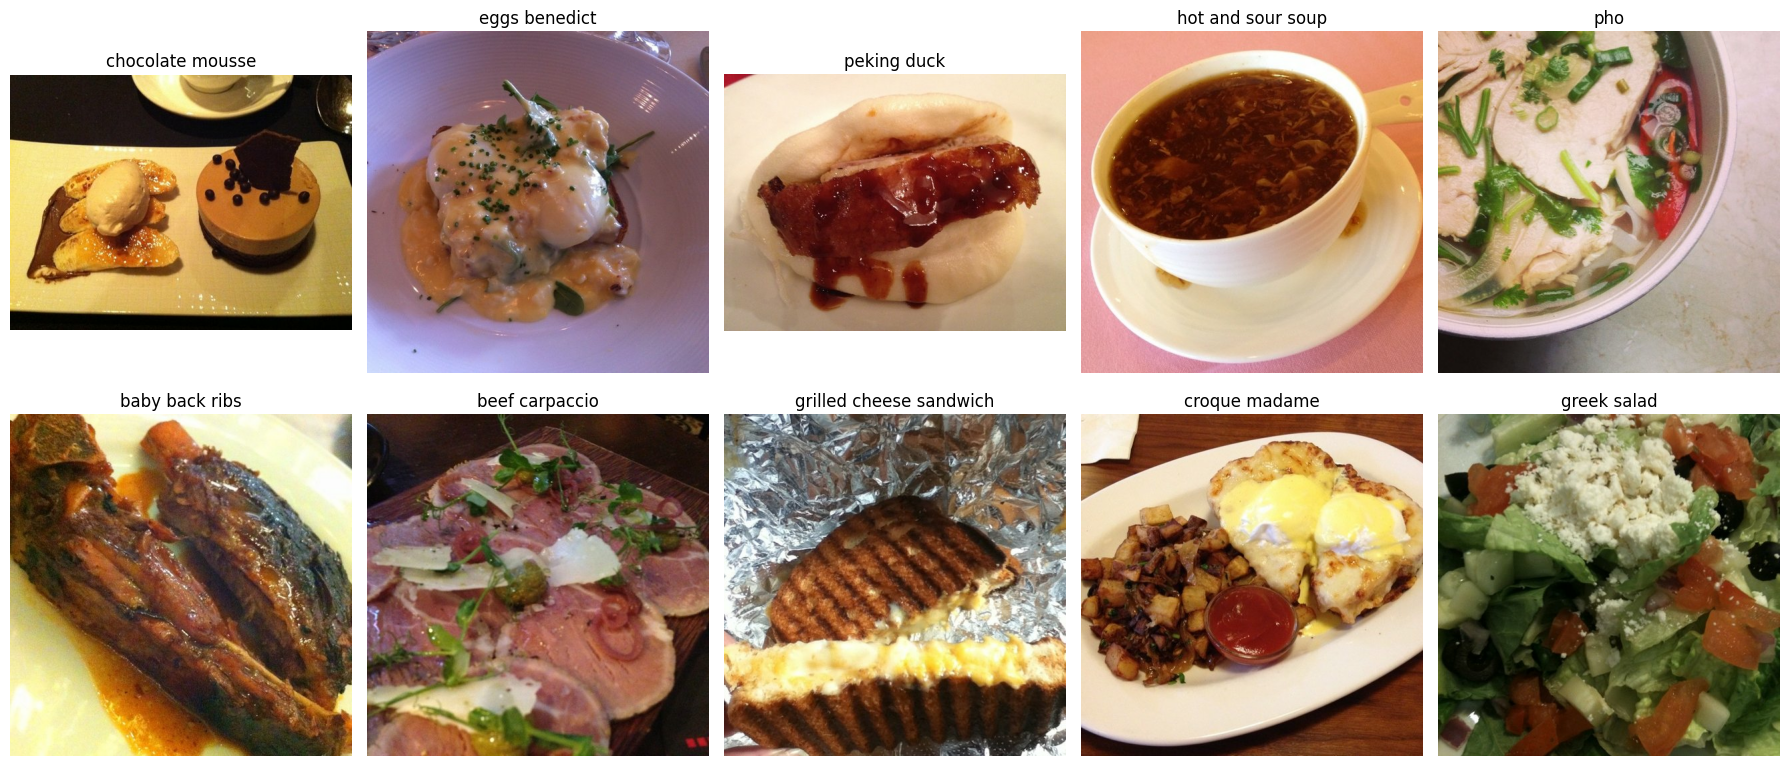

In [56]:
# random images of any class
view_10_random_images(test, label_names)

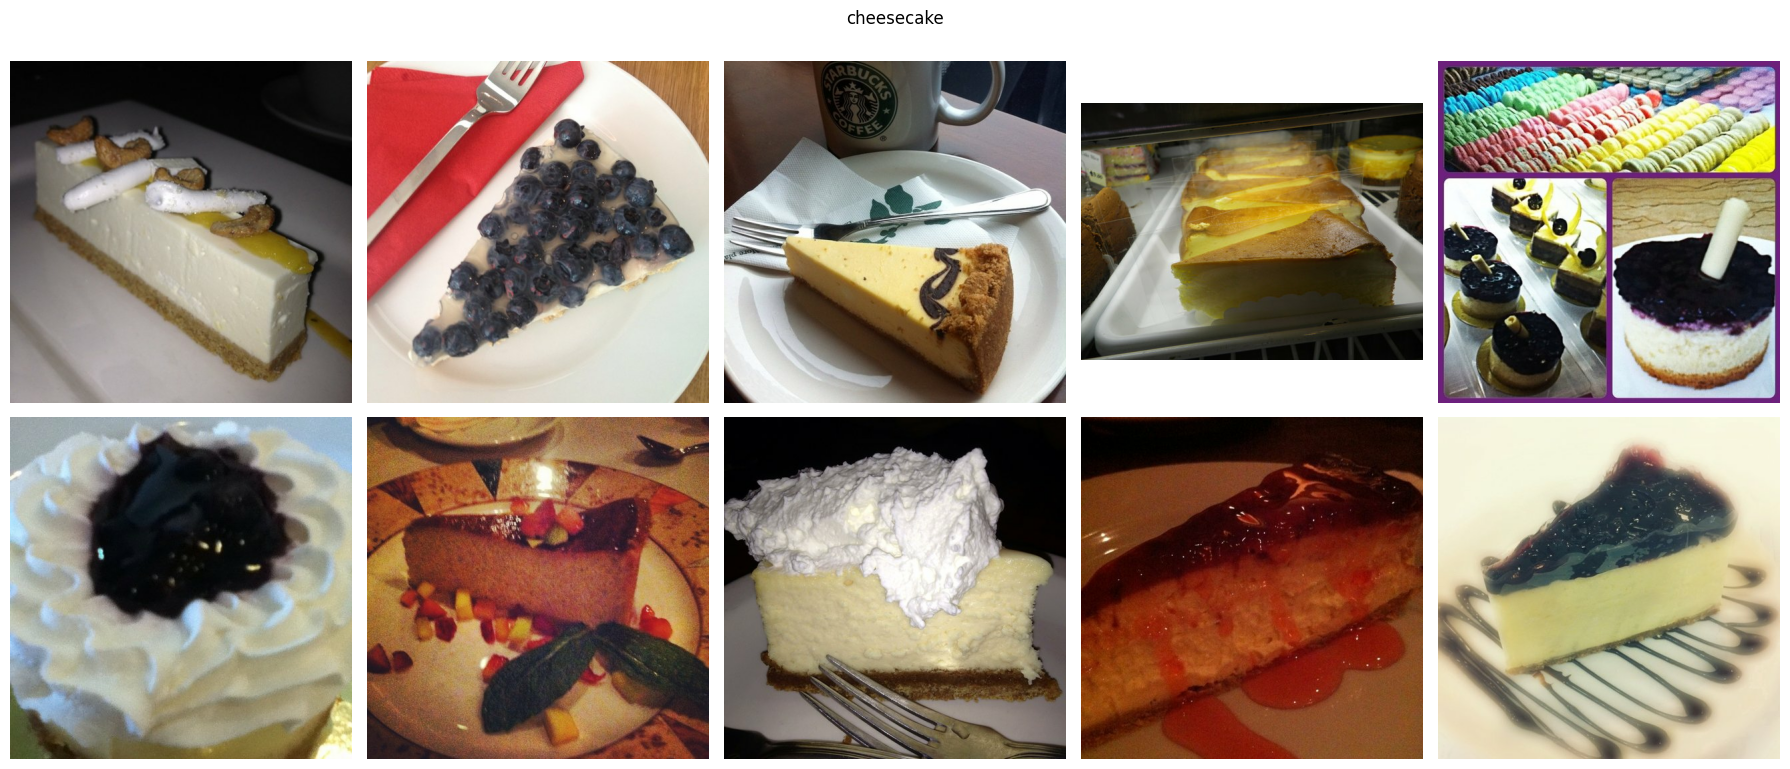

In [28]:
# random images of 1 selected class
view_10_random_images(train, label_names, target_classes=['cheesecake'])

## Potential problems identified

* sometimes there are images of poor quality, or do not show the food but, for example, the window of a restaurant
* incorrectly assigned labels may occur (according to the dataset description)
* dishes have similar toppings/side dishes, which can be identified as separate dish (for example we have `french fries` class and fries also appear in photos with `steak` or different sandwiches; `macarons` pictured with cheesecake (above))
* very similar-looking dishes, for instance: `filet mignon` and `steak` (below)

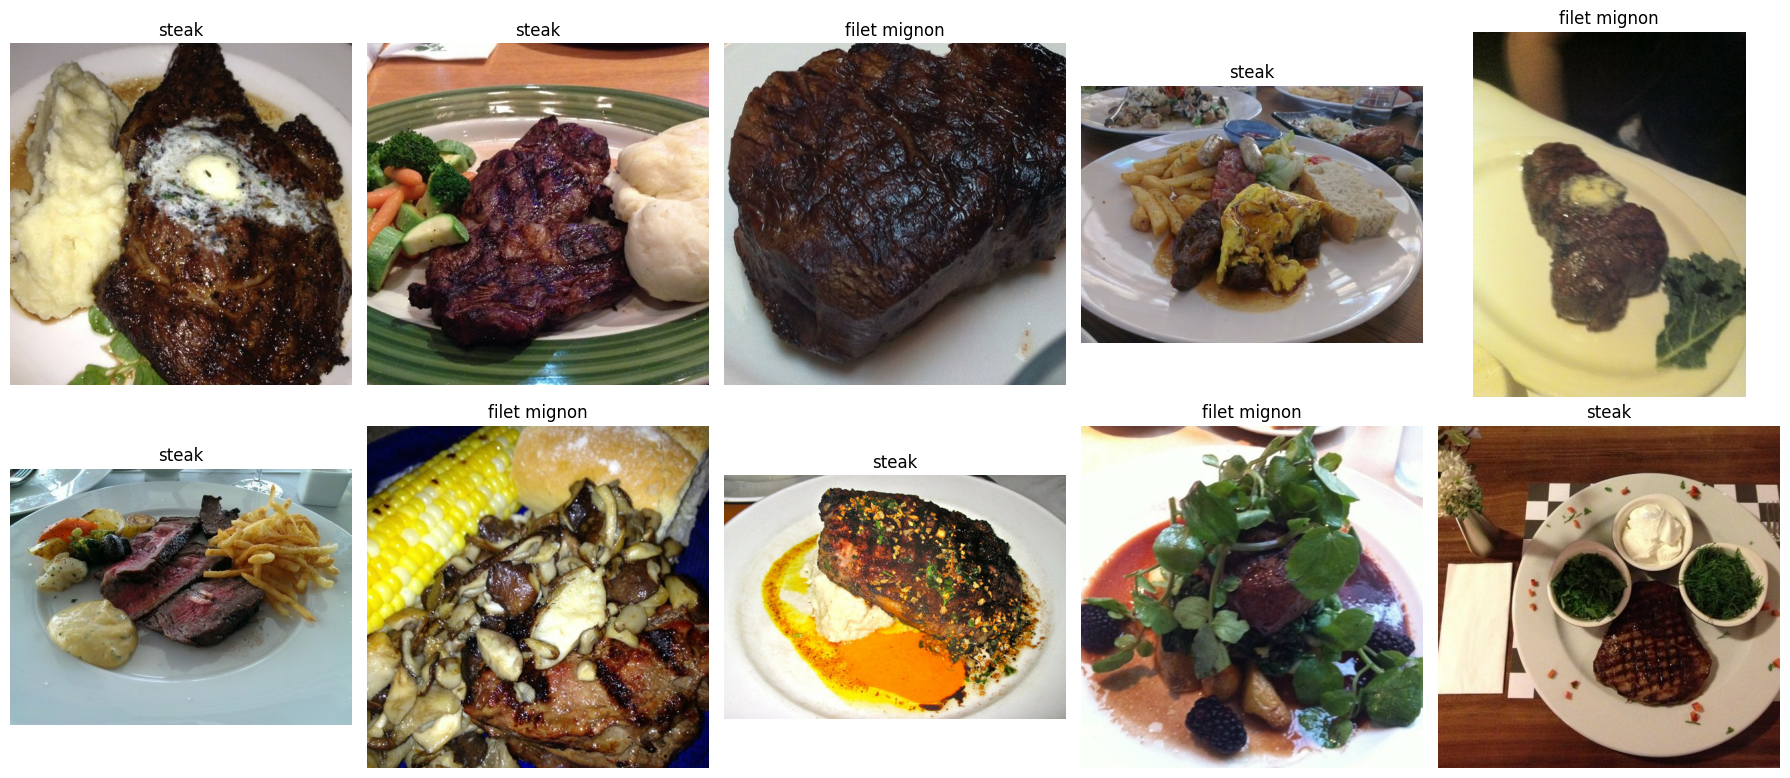

In [22]:
# random images of 2 selected classes
view_10_random_images(train, label_names, target_classes=['filet_mignon', "steak"])

# Cleaning

In order to get a better look at the data and get rid of unwanted invalid images, saved the data to png files for more convenient viewing.

In [6]:
save_dataset_as_pngs(test, "food101_train")
save_dataset_as_pngs(test, "food101_test")

# creating directories for removed files
removed_dir = "removed"
for i, class_name in enumerate(label_names):
    path = os.path.join(removed_dir, f"{i}_{class_name}")
    os.makedirs(path, exist_ok=True)

In [13]:
n_removed_imgs = 0

# counting removed images
for class_dir in os.listdir(removed_dir):
    full_path = os.path.join(removed_dir, class_dir)
    if os.path.isdir(full_path):
        if os.listdir(full_path):
            n = len(os.listdir(full_path))
            n_removed_imgs += n

n_removed_imgs

919

## Example removed images

919 images in total was manually removed, because they did not represent the dish of the class, were misleading or were of very poor quality, e.g. the following 8 labeled as **pizza**:

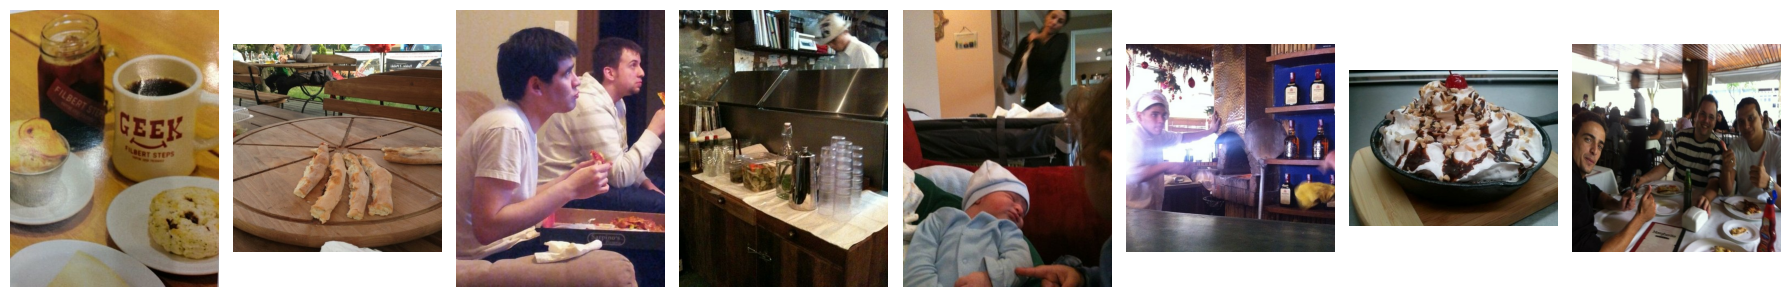

In [19]:
target_dir = "76_pizza"

plt.figure(figsize=(18, 6))
class_dir = os.path.join(removed_dir, target_dir)
for i, img_file in enumerate(sample(os.listdir(class_dir), 8)):
    img = mpimg.imread(os.path.join(class_dir, img_file))
    plt.subplot(1, 8, i + 1)
    plt.imshow(img)
    plt.axis("off")
plt.tight_layout()
plt.show()

# Final class distribution

In [20]:
train = "food101_train"
test = "food101_test"

distribution = {}

for label, train_subdir, test_subdir in zip(
        label_names,
        sorted(os.listdir(train), key=int),
        sorted(os.listdir(test), key=int)
    ):
    train_dir = os.path.join(train, train_subdir)
    test_dir = os.path.join(test, test_subdir)

    distribution[label] = [len(os.listdir(train_dir)), len(os.listdir(test_dir))]


pd.set_option("display.max_rows", None)
pd.DataFrame(distribution, index=["Train", "Test"]).T.sort_values("Train", ascending=False)

Train  Test
hot_and_sour_soup          750   250
french_onion_soup          749   250
seaweed_salad              749   250
edamame                    748   250
baby_back_ribs             748   250
huevos_rancheros           748   250
club_sandwich              748   250
fried_calamari             748   250
poutine                    748   250
deviled_eggs               748   250
gyoza                      747   250
lobster_bisque             747   250
paella                     747   250
spring_rolls               747   250
fish_and_chips             747   250
risotto                    747   250
garlic_bread               747   250
clam_chowder               747   250
bread_pudding              746   250
onion_rings                746   250
caprese_salad              746   250
grilled_cheese_sandwich    746   250
filet_mignon               746   250
panna_cotta                746   250
spaghetti_bolognese        746   250
mussels                    746   250
pho                        745   250
bibimbap                   745   250
baklava                    745   250
pad_thai                   745   250
french_toast               745   250
french_fries               744   250
pancakes                   744   250
chicken_wings              744   250
beef_carpaccio             744   250
apple_pie                  744   251
bruschetta                 744   250
lasagna                    744   250
greek_salad                744   250
miso_soup                  744   250
guacamole                  743   250
spaghetti_carbonara        743   250
samosa                     743   250
sashimi                    743   250
beet_salad                 743   250
lobster_roll_sandwich      742   250
tiramisu                   742   250
cheese_plate               742   250
ceviche                    742   250
croque_madame              742   250
eggs_benedict              742   250
chicken_quesadilla         742   250
nachos                     742   250
caesar_salad               741   250
crab_cakes                 741   250
takoyaki                   741   250
fried_rice                 741   250
tuna_tartare               741   250
peking_duck                741   250
steak                      740   250
shrimp_and_grits           740   250
grilled_salmon             740   250
prime_rib                  739   250
oysters                    739   250
beignets                   739   250
creme_brulee               739   250
falafel                    739   250
escargots                  739   250
beef_tartare               739   250
pulled_pork_sandwich       739   250
waffles                    739   250
breakfast_burrito          738   250
ramen                      738   250
scallops                   738   250
hamburger                  738   250
cup_cakes                  738   250
dumplings                  738   250
cannoli                    738   250
churros                    738   250
omelette                   738   250
hummus                     738   250
foie_gras                  737   250
donuts                     737   250
ravioli                    737   250
frozen_yogurt              736   250
pork_chop                  736   250
macaroni_and_cheese        736   250
hot_dog                    736   250
macarons                   735   250
pizza                      735   250
cheesecake                 734   250
chicken_curry              734   250
tacos                      733   250
strawberry_shortcake       732   250
sushi                      730   250
ice_cream                  728   250
red_velvet_cake            727   250
chocolate_cake             726   250
gnocchi                    726   250
chocolate_mousse           723   250
carrot_cake                723   250